# 多元非線性迴歸

## 載入測試資料

In [1]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=300, n_features=2, noise=50)

## 繪圖

Text(0.5, 0.92, 'test data')

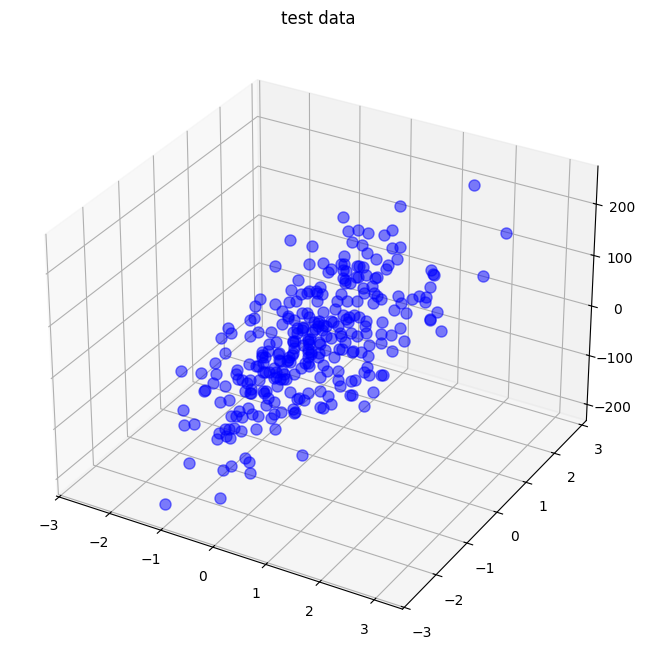

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.rcParams["legend.fontsize"] = 10
ax.plot(X[:, 0], X[:, 1], y, "o", markersize=8, color="blue", alpha=0.5)
plt.title("test data")

## 使用 PolynomialFeatures 產生多項式

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # 2 次方
X_new = poly.fit_transform(X)  # 轉換
X_new.shape

(300, 6)

In [4]:
poly.get_feature_names_out(["x1", "x2"])

array(['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2'], dtype=object)

## 資料分割

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 6), (60, 6), (240,), (60,))

## 特徵縮放

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 模型訓練

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.coef_, lr.intercept_

(array([ 0.00000000e+00,  6.18412000e+01,  4.00032149e+01,  4.00852969e-02,
         1.08426660e+00, -1.63049048e-01]),
 -5.426197287206063)

## 模型評分

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2、MSE、MAE
y_pred = lr.predict(X_test_std)
print(f"R2 = {r2_score(y_test, y_pred)*100:.2f}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

R2 = 55.01
MSE = 2747.036188314331
MAE = 42.60411042418041


## 使用原始特徵的模型評分

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print(f"R2 = {r2_score(y_test, y_pred)*100:.2f}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

R2 = 74.43
MSE = 2452.1439941978824
MAE = 40.297486086535265
